# PlantVillage Preprocessing Report

This notebook was **auto-generated** after running the preprocessing pipeline. It documents dataset structure, class counts, sample images, and the train/val/test split.

**Data root:** `/app/data/processed`  
**Target size:** 224×224  
**Splits:** train / val / test

## Environment Check (paths & splits)

In [1]:
from pathlib import Path
DATA_ROOT = Path('/app/data/processed')
print('Data root:', DATA_ROOT)
if not DATA_ROOT.exists():
    print('WARNING: data root does not exist.')
splits = [p.name for p in DATA_ROOT.iterdir() if p.is_dir()] if DATA_ROOT.exists() else []
print('Splits found:', splits)
for split in ['train', 'val', 'test']:
    p = DATA_ROOT / split
    if p.exists():
        classes = sorted([d.name for d in p.iterdir() if d.is_dir()])
        print(f'{split} classes ({len(classes)}):', classes[:10], '...' if len(classes) > 10 else '')
    else:
        print(split, 'missing')


Data root: /app/data/processed
Splits found: ['test', 'train', 'val']
train classes (15): ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot'] ...
val classes (15): ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot'] ...
test classes (15): ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot'] ...


## Imports

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

%matplotlib inline
DATA_ROOT = Path('/app/data/processed')


## Class Counts (Train / Val / Test)

In [3]:
            # dicts injected by the generator (this script)
            train_counts = {
  "Pepper__bell___Bacterial_spot": 893,
  "Pepper__bell___healthy": 1331,
  "Potato___Early_blight": 907,
  "Potato___Late_blight": 897,
  "Potato___healthy": 135,
  "Tomato_Bacterial_spot": 1934,
  "Tomato_Early_blight": 907,
  "Tomato_Late_blight": 1711,
  "Tomato_Leaf_Mold": 871,
  "Tomato_Septoria_leaf_spot": 1617,
  "Tomato_Spider_mites_Two_spotted_spider_mite": 1534,
  "Tomato__Target_Spot": 1272,
  "Tomato__Tomato_YellowLeaf__Curl_Virus": 2935,
  "Tomato__Tomato_mosaic_virus": 346,
  "Tomato_healthy": 1460
}
            val_counts   = {
  "Pepper__bell___Bacterial_spot": 281,
  "Pepper__bell___healthy": 406,
  "Potato___Early_blight": 269,
  "Potato___Late_blight": 276,
  "Potato___healthy": 45,
  "Tomato_Bacterial_spot": 582,
  "Tomato_Early_blight": 279,
  "Tomato_Late_blight": 524,
  "Tomato_Leaf_Mold": 264,
  "Tomato_Septoria_leaf_spot": 495,
  "Tomato_Spider_mites_Two_spotted_spider_mite": 461,
  "Tomato__Target_Spot": 394,
  "Tomato__Tomato_YellowLeaf__Curl_Virus": 894,
  "Tomato__Tomato_mosaic_virus": 108,
  "Tomato_healthy": 444
}
            test_counts  = {
  "Pepper__bell___Bacterial_spot": 274,
  "Pepper__bell___healthy": 406,
  "Potato___Early_blight": 278,
  "Potato___Late_blight": 267,
  "Potato___healthy": 41,
  "Tomato_Bacterial_spot": 585,
  "Tomato_Early_blight": 273,
  "Tomato_Late_blight": 522,
  "Tomato_Leaf_Mold": 265,
  "Tomato_Septoria_leaf_spot": 488,
  "Tomato_Spider_mites_Two_spotted_spider_mite": 475,
  "Tomato__Target_Spot": 387,
  "Tomato__Tomato_YellowLeaf__Curl_Virus": 907,
  "Tomato__Tomato_mosaic_virus": 107,
  "Tomato_healthy": 443
}

            # Build a single DataFrame (missing classes -> 0)
            df = pd.DataFrame({
                'train': train_counts,
                'val': val_counts,
                'test': test_counts
            }).fillna(0).astype(int)

            # Sort columns alphabetically for readability
            df = df.sort_index()
            df


,train,val,test
Pepper__bell___Bacterial_spot,893,281,274
Pepper__bell___healthy,1331,406,406
Potato___Early_blight,907,269,278
Potato___Late_blight,897,276,267
Potato___healthy,135,45,41
Tomato_Bacterial_spot,1934,582,585
Tomato_Early_blight,907,279,273
Tomato_Late_blight,1711,524,522
Tomato_Leaf_Mold,871,264,265
Tomato_Septoria_leaf_spot,1617,495,488


### Bar Chart (Per-class counts by split)

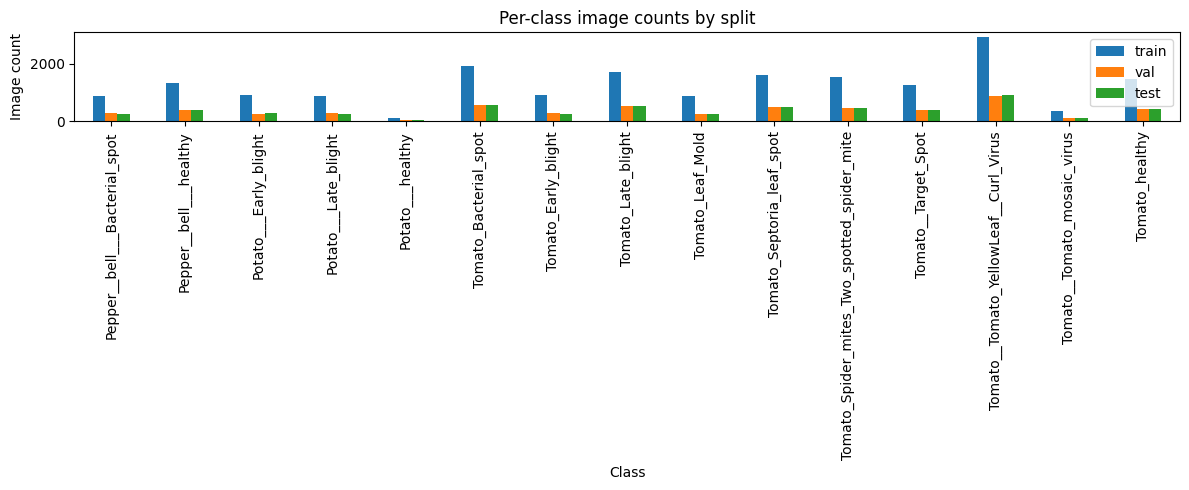

In [4]:
ax = df.plot(kind='bar', figsize=(12, 5))
ax.set_xlabel('Class')
ax.set_ylabel('Image count')
ax.set_title('Per-class image counts by split')
plt.tight_layout()
plt.show()


## Sample Images (Train)

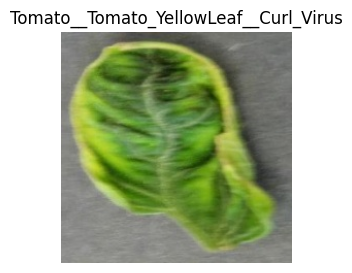

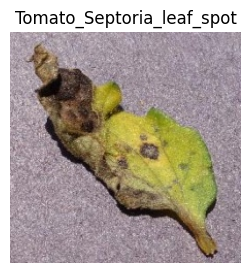

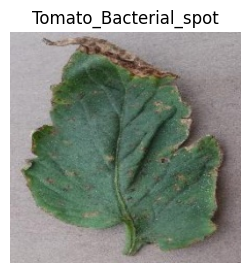

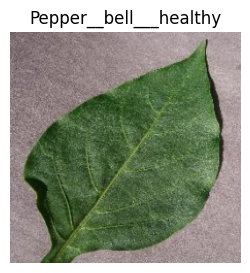

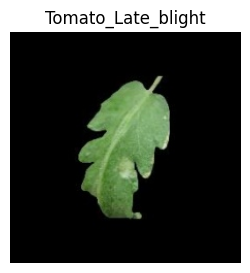

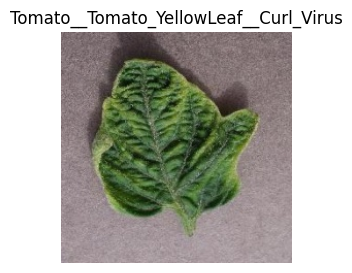

In [5]:
            samples = [
  "/app/data/processed/train/Tomato__Tomato_YellowLeaf__Curl_Virus/3f078443-1d3f-4aac-beb0-b80636ad74da___UF.GRC_YLCV_Lab 02862.JPG",
  "/app/data/processed/train/Tomato_Septoria_leaf_spot/84c0ad52-6b43-43fc-8112-d14f1e9c94c0___Matt.S_CG 6871.JPG",
  "/app/data/processed/train/Tomato_Bacterial_spot/c0937468-f1fc-4c71-b0e9-f7ab93d28650___GCREC_Bact.Sp 3469.JPG",
  "/app/data/processed/train/Pepper__bell___healthy/14d0f6a3-c314-4faa-8d6f-1770b21f4f04___JR_HL 8551.JPG",
  "/app/data/processed/train/Tomato_Late_blight/233f5fca-7077-4175-a29f-57f310ea7879___GHLB_PS Leaf 51 Day 18.jpg",
  "/app/data/processed/train/Tomato__Tomato_YellowLeaf__Curl_Virus/67206390-2511-488b-82a6-7e3c01b37987___YLCV_NREC 0071.JPG"
]
            from pathlib import Path
            for p in samples:
                try:
                    img = Image.open(p).convert('RGB')
                    plt.figure(figsize=(3,3))
                    plt.imshow(img)
                    plt.title(Path(p).parent.name)
                    plt.axis('off')
                    plt.show()
                except Exception as e:
                    print('Could not open', p, e)


## Split Summary

In [6]:
summary = pd.DataFrame({
    'split': ['train', 'val', 'test'],
    'count': [df['train'].sum(), df['val'].sum(), df['test'].sum()]
})
summary


,split,count
0,train,18750
1,val,5722
2,test,5718


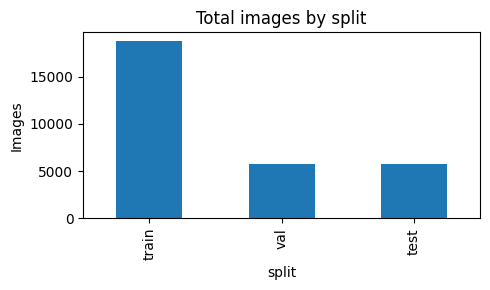

In [7]:
ax = summary.set_index('split').plot(kind='bar', figsize=(5,3), legend=False)
ax.set_ylabel('Images')
ax.set_title('Total images by split')
plt.tight_layout()
plt.show()


## Notes

- Images were resized to **224×224** during preprocessing.
- **Normalization** (mean/std) is applied at **training time** in the dataloader.
- Shown classes reflect filtered crops (e.g., Tomato / Potato / Corn).
- This notebook is **auto-generated**; re-run the report script to refresh after dataset changes.